# natural language processing (naive bayes--- movie review)

In [2]:
# imports for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("C:\\natural language processing\\moviereviews.csv")
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


# data cleaning

In [6]:
# drop the null values
df.dropna(axis = 0,inplace= True)

In [23]:
# deop all the values that are not null but are empty string values
empty_index= df["review"].str.isspace()
df= df[~empty_index]

In [37]:
# convert the text into numerical encoded feature vectors 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [38]:
# divide the dataset into  features and label
X= df.review
y= df.label

In [39]:
# divide the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# design a pipeline

In [41]:
# make a pipeline to vectorize text data and fit it to the model
pipe= Pipeline([("tfidf",TfidfVectorizer()),("svc",LinearSVC())])

In [42]:
# fit the data to the pipeline
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

# model evaluation

              precision    recall  f1-score   support

         neg       0.87      0.84      0.86       186
         pos       0.86      0.88      0.87       202

    accuracy                           0.86       388
   macro avg       0.86      0.86      0.86       388
weighted avg       0.86      0.86      0.86       388



<Axes: >

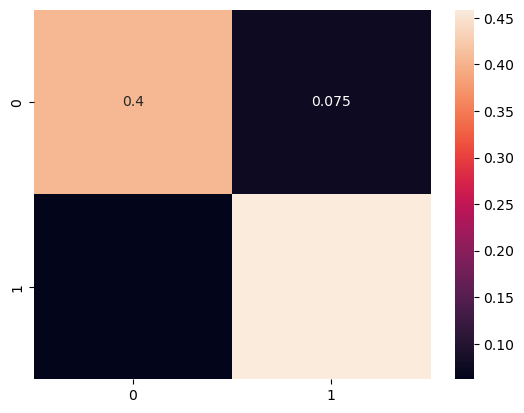

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
predictions= pipe.predict(X_test)
print(classification_report(y_test,predictions))
# visualise the confusion matrix using a heatmap
sns.heatmap(confusion_matrix(y_test,predictions,normalize= "all"),annot= True)